<a href="https://colab.research.google.com/github/zenpp/Data-Science-Mini-Project/blob/master/Ramen%20Ratings/Ramen_Ratings_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
#mounted google drive for raw file importing
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#import raw data
file_path = '/content/drive/My Drive/Shareable /Data Science Projects/Ramen Ratings/'
data = pd.read_csv(file_path + 'ramen-ratings.csv')
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2578 non-null object
Country     2580 non-null object
Stars       2580 non-null object
Top Ten     41 non-null object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [0]:
#check column Stars becuase it supposed to be a numeric type
data['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [0]:
#we found that there is string 'Unreated' so we check it first
data[data['Stars'] == 'Unrated']

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,NaN


In [0]:
#we can drop those rows because it's a very small number 
data = data.drop(data[data['Stars'] == 'Unrated'].index)

In [0]:
#change column Stars to numeric type
data['Stars'] = pd.to_numeric(data['Stars'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2577 non-null int64
Brand       2577 non-null object
Variety     2577 non-null object
Style       2575 non-null object
Country     2577 non-null object
Stars       2577 non-null float64
Top Ten     41 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 161.1+ KB


In [0]:
#check some statistics of column stars 
#seems like it has a highly skewed
data.describe()

,Review #,Stars
count,2577.000000,2577.000000
mean,1289.443927,3.654676
std,744.569010,1.015331
min,1.000000,0.000000
25%,645.000000,3.250000
50%,1289.000000,3.750000
75%,1934.000000,4.250000
max,2580.000000,5.000000


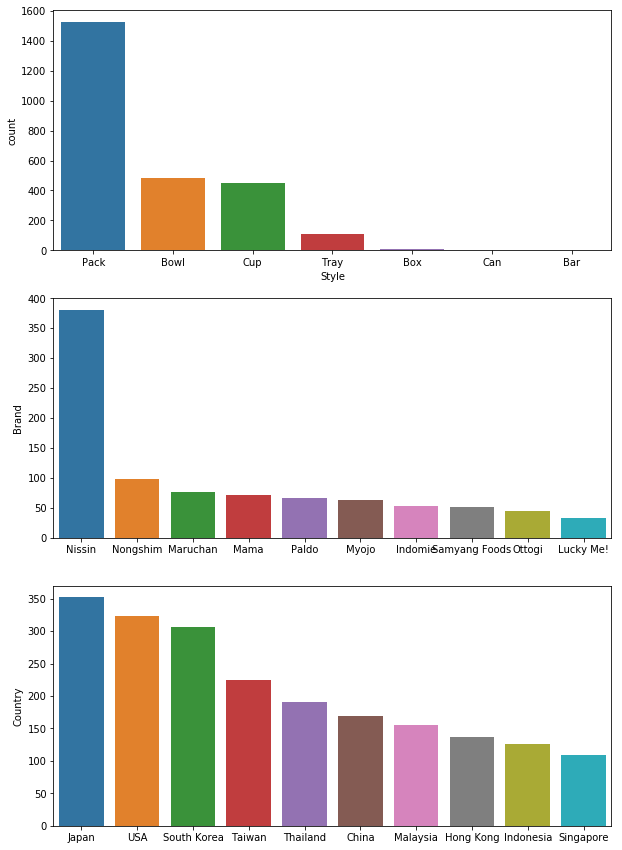

In [0]:
fig, axs = plt.subplots(nrows=3)
fig.set_size_inches(10,15)
sns.countplot(x = 'Style' ,data = data ,order = data['Style'].value_counts().index , ax=axs[0])
sns.barplot(x = data['Brand'].value_counts().head(10).index , y = data['Brand'].value_counts().head(10) , ax=axs[1])
sns.barplot(x = data['Country'].value_counts().head(10).index , y = data['Country'].value_counts().head(10) , ax=axs[2])

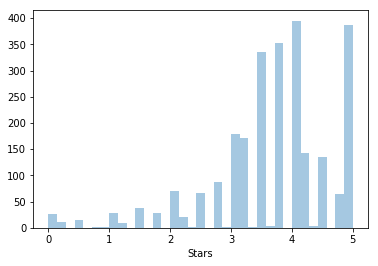

In [0]:
sns.distplot(data['Stars'] , kde = False)

[Text(0, 0, 'Japan'),
 Text(0, 0, 'Taiwan'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'India'),
 Text(0, 0, 'South Korea'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Thailand'),
 Text(0, 0, 'Hong Kong'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Ghana'),
 Text(0, 0, 'Malaysia'),
 Text(0, 0, 'Indonesia'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Nigeria'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Hungary'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Fiji'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Pakistan'),
 Text(0, 0, 'Bangladesh'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Nepal'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Myanmar'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Sarawak'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Colombia'),
 Text(0, 0, 'Estonia'),
 Text(0, 0, 'Holland'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Dubai')]

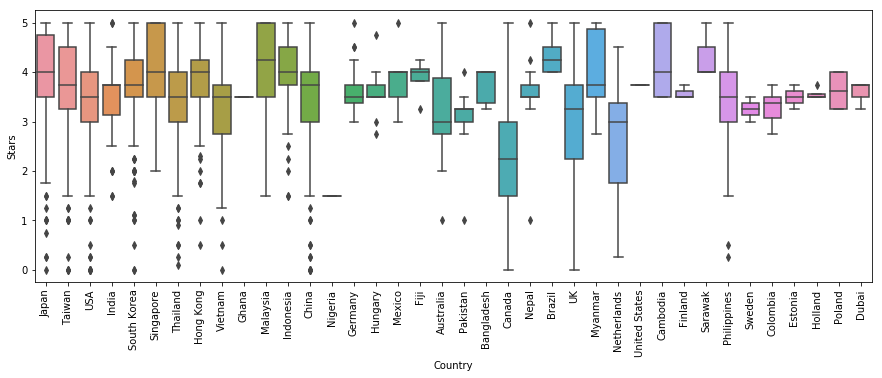

In [0]:
fig, axs = plt.subplots(nrows=1)
fig.set_size_inches(15,5)
cr = sns.boxplot(x = 'Country' , y = 'Stars' , data = data)
cr.set_xticklabels(cr.get_xticklabels(), rotation=90)